# Ex. 08.1-2  - Variational Monte Carlo (VMC)

In questo esercizio si è cercato di approssimare con metodi variazionali l'energia e la funzione d'onda di ground state di una particella quantistica posta in un potenziale $V(x)$ 1D:

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Il problema - non risolvibile analiticamente - può essere facilmente affrontato con metodi variazionali poichè è possibile riscrivere il valore di aspettazione dell'Hamiltioniana $H$ su uno stato del sistema come una media classica con distribuzione di probabilità pari al modulo quadro della funzione d'onda - opportunamente normalizzato. Infatti:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

dove $\Psi_{T}(x)$ è una funzione d'onda di prova, per cui è sempre vera la seguente disuguaglianza (principio variazionale):

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

Scelta una funzione d'onda di prova, l'integrale $\langle {\hat H} \rangle_T$ può quindi essere calcolato campionando la distribuzione di probabilità $\frac{|\Psi_{T}(x)|^2}{\int dx |\Psi_{T}(x)|^2 }$ con algoritmi Monte Carlo (da qui il nome Variational Monte Carlo).

Nel nostro caso, è stata scelta la funzione d'onda di prova:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

che dipende dai due parametri $\mu$ e $\sigma$. 
  
Per valutare correttamente l'energia in funzione della posizione è necessario esprimere gli operatori energia potenziale ed energia cinetica utilizzando la loro rappresentazione sulla base delle coordinate:

- $V(x,x')=(x^4- \frac{5}{2}x^2)\cdot\delta(x-x')$
- $K(x,x')=(-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2})\cdot\delta(x-x')$

Sono state adottate le unità naturali, per cui $\hbar=1$ e $m=1$.

### Campionamento dello spazio dei parametri

Per riuscire ad approssimare il minimo dell'energia è stato necessario aggiungere una parte di codice che effettuasse un campionamento dello spazio dei parametri $(\mu,\sigma)$. E'stato quindi implementato un random walk bidimensionale con l'algoritmo seguente:

- stima del valor medio dell'energia di g-s $E_{g-s}=E(\mu_{0},\sigma_{0})$ (con algoritmo Metropolis) con parametri iniziali $(\mu_{0},\sigma_{0})$
- scelta del parametro da variare con probabilità $1/2$
- variazione del parametro: 
$\mu_{new}=\mu_{0}+\delta\omega $ oppure $\sigma_{new}=\sigma_{0}+\delta\omega$
 dove $\omega$ è un numero estratto con distribuzione di probabilità uniforme nell'intervallo [-1,1] e $\delta$ è il passo. E' stato scelto il valore $\delta=0.1$

- stima del valor medio dell'energia $E(\mu_{new},\sigma_{0})$ (o $E(\mu_{0},\sigma_{new})$) con i nuovi parametri
- confronto di $E_{new}$ con $E_{g-s}$. Se $E_{new}<E_{g-s}$ la mossa viene accettata, i parametri aggiornati e $E_{g-s}=E_{new}$

Lo schema è stato quindi ripetuto per un certo numero di passi. Per la stima dell'energia di g-s sono state lanciate simulazioni per un totale di $5x10^{5}$ passi Monte Carlo ($500$ blocchi, $1000$ passi per blocco). 

Chiaramente, l'algoritmo adottato impedisce di passare a "stati" $(\mu,\sigma)$ ad energia più alta e una volta effettuato un passo non è possibile tornare indietro. Lo spazio dei parametri non viene quindi esplorato in maniera ergodica. Per evitare di finire in minimi locali è quindi necessario effettuare più cammini da punti di partenza differenti.  
Conoscendo la forma funzionale del potenziale, si è deciso di restringere i punti di partenza principalmente all'area $[0,1]x[0,1]$, in maniera tale da evitare eventuali minimi locali che non corrispondessero al ground state e per ottenere convergenze con un numero di passi non superiore a 200. Per completezza sono state lanciate simulazioni anche per valori di $\sigma$ e $\mu$ poco al di fuori di quel range, anche per valori negativi.

I grafici sotto riportati mostrano i 15 cammini nello spazio dei parametri: si può osservare che 12 cammini (quelli con i punti d'arrivo evidenziati da una stella nera) convergono in prossimità del punto ($\mu=0.8,\sigma=0.6$) - o punti ad esso simmetrici rispetto agli assi o all'origine (il segno dei parametri è ininfluente) - a cui corrisponde un'energia $E_{gs} \approx -0.45$ (prossima al valore noto di $E_{gs}\approx-0,46$). I restanti 3 cammini (quelli  sbiaditi e con i punti d'arrivo evidenziati da una stella grigia) convergono ad altri punti ad energia più alta e sono stati quindi scartati. Si è deciso di adottare come parametri ottimali le medie aritmetiche dei valori finali di $\mu$ e $\sigma$ relativi ai 12 cammini presi in considerazione. 

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from decimal import Decimal as d

/Users/costanza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/costanza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


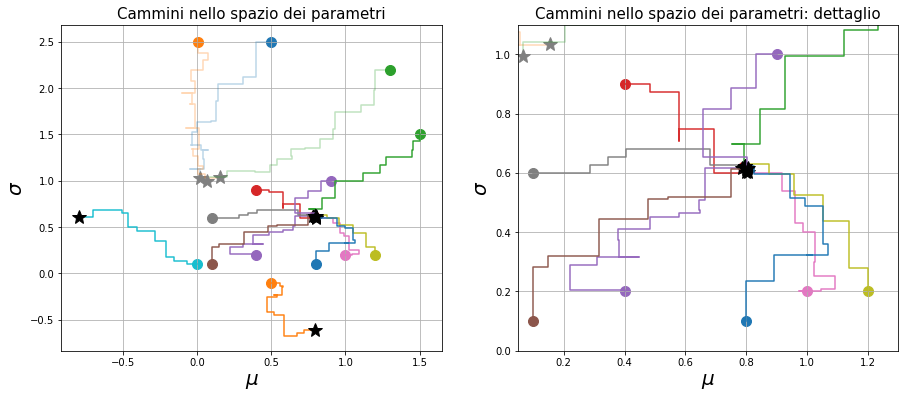

Valor medio di <H_gs> = -0.445
<μ> = 0.80
<σ> = 0.61


In [4]:
ave_mean = 0
ave_sigma = 0
ave_ene = 0

plt.figure(figsize = (15, 6))

for i in range(15):
    mean,sigma,ene,err = np.loadtxt("Output/Paths/path_"+str(i+1)+".txt",usecols=(1,3,4,5),unpack='true')
    end = len(mean)-1
    
    if(i<3): 
        alpha = 0.3
        color = 'grey'
    else:
        alpha = 10
        color = 'black'
    
    plt.subplot(1,2,1)
    plt.plot(mean,sigma,'-',alpha=alpha)
    plt.title('Cammini nello spazio dei parametri',size=15)
    plt.xlabel('$\mu$',size=20)
    plt.ylabel('$\sigma$',size=20)
    plt.scatter(mean[0],sigma[0],s=100) 
    plt.plot(mean[end],sigma[end],'*',color =color,ms=15) # stella nera: punto di arrivo
    plt.grid(True)
    
    plt.subplot(1,2,2)
    plt.plot(mean,sigma,'-',alpha=alpha)
    plt.title('Cammini nello spazio dei parametri: dettaglio',size=15)
    plt.xlabel('$\mu$',size=20)
    plt.ylabel('$\sigma$',size=20)
    plt.scatter(mean[0],sigma[0],s=100)
    plt.plot(mean[end],sigma[end],'*',color =color,ms=15) # stella nera: punto di arrivo
    plt.xlim(0.05,1.3)
    plt.ylim(0.0,1.1)
    plt.grid(True)
    
    if(i>2):
        ave_mean += np.abs(mean[end])/12.
        ave_sigma += np.abs(sigma[end])/12.
        ave_ene += ene[end]/12.        
        
plt.show()

print('Valor medio di <H_gs> =',round(d(ave_ene),3))
print('<\u03BC> =',round(d(ave_mean),2))
print('<\u03C3> =',round(d(ave_sigma),2))

Di seguito sono rappresentati i grafici del potenziale $V(x)$ e della distribuzione di probabilità $\frac{|\Psi_{0}(x)|^{2}}{\int dx|\Psi_{0}(x)|^{2}}$ - con parametri ottimizzati mediante VMC ($\mu=0.8$ e $\sigma=0.61$) - in funzione della posizione $x$ della particella.

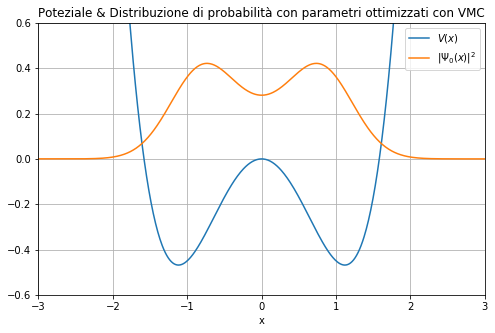

In [8]:
# Potenziale a doppia buca
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

# Doppia gaussiana
def DoubleGauss(x, a, b):
    return 1/(b**2 * math.pi * (2 + np.exp(-a**2/b**2)))*(np.exp(-0.5*(x-a)**2/b**2) + np.exp(-0.5*(x+a)**2/b**2))**2
    
a = 10
N = 1000
mean = 0.8
sigma = 0.61

# Step sizes
x = np.linspace(-a/2, a/2, N)
V = Vpot(x)

PSI2 = DoubleGauss(x,mean,sigma)

plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, label="$V(x)$")
plt.plot(x,PSI2, label="$|\Psi_{0}(x)|^{2}$")
plt.title("Poteziale & Distribuzione di probabilità con parametri ottimizzati con VMC")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

### Stima dell'energia di ground state con parametri ottimizzati

Di seguito è riportato il grafico del valore di aspettazione dell'energia $E_{0}=\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}$ sul ground state approssimato ($\mu=0.8$,$\sigma=0.61$) in funzione del numero di blocchi. Sono stati simulati $500$ blocchi da $1000$ passi MC utilizzando una probabilità di transizione di prova uniforme nell'intervallo $[-\delta,\delta]$, dove è stato scelto $\delta=2.5$ per ottenere un rate di accettazione della mossa del $50\%$. Sono stati effettuati $1000$ passi per equilibrare il sistema.

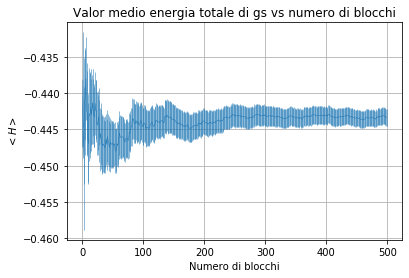

Optimized ground state energy <H>:  -0.443  +/-  0.001


In [9]:
# grafico valore di aspettazione dell'energia sul GS ottenuto con VMC in funzione del numero di blocchi
ene,err_ene = np.loadtxt("Output/Average/etot.txt", usecols = (1,2),unpack = 'true')
L = len(ene)
block = np.arange(L)

plt.errorbar(block,ene,err_ene,linewidth=0.5)
plt.title("Valor medio energia totale di gs vs numero di blocchi")
plt.xlabel("Numero di blocchi")
plt.ylabel("$<H>$")
plt.grid()
plt.show()

print("Optimized ground state energy <H>: ",round(ene[L-1],3), " +/- ", round(err_ene[L-1],3))

### Istogramma della distribuzione di probabilità del ground state stimato

Infine si riporta l'istogramma della distribuzione di probabilità ottenuto campionando la posizione $x$ della particella durante la simulazione MC e si confronta con la curva analitica e la soluzione numerica ottenuta trasformando l'equazione di Schrödinger in un'equazione matriciale.

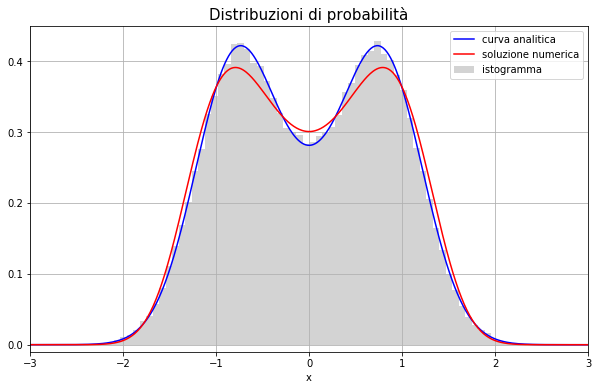

Energia di ground state (soluzione numerica):  -0.46
Energia di ground state (simulazione):  -0.443 +/- 0.001


In [10]:
# Caricamento istogramma otteuto dalla simulazione
histo,err_histo = np.loadtxt("Output/Average/histo.txt",usecols = (0,1), unpack = 'true')

n_bins = len(histo)
x_min = -3.5
x_max = 3.5
r = np.linspace(x_min,x_max,n_bins)

# Soluzione analitica (con parametri da VMC)
y = DoubleGauss(x,mean,sigma)

# The central differences method
hbar = 1
m = 1

dx = x[1] - x[0] # the step size

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

# Plot distribuzioni di probabilità
plt.figure(figsize=(10,6))

plt.hist(r,bins=n_bins,density=True, weights=histo,label='istogramma',color='lightgrey')          
plt.plot(x,y,label = "curva analitica",color='blue')
plt.plot(x,(psi[0])**2,label="soluzione numerica",color='red')
plt.title("Distribuzioni di probabilità",size=15)
plt.xlabel("x")
plt.grid(True)
plt.legend()
plt.xlim((-3,3))
plt.ylim((-0.01,0.45))
plt.show()

print("Energia di ground state (soluzione numerica): ",round(E[0],3))
print("Energia di ground state (simulazione): ",round(ene[L-1],3),"+/-",round(err_ene[L-1],3))

La discrepanza tra il valore di energia di ground state ottenuto dalla simulazione e la soluzione numerica è maggiore dell'errore statistico, ma bisogna considerare il fatto che la funzione d'onda ottimizzata con il VMC è un'approssimazione della vera funzione d'onda del sistema.